In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# 격자 스타일 적용
# plt.style.use('ggplot')

# 음수 값 꺠짐 방지 
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic' # plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
# 데이터 로딩
raw = pd.read_csv('../매출전처리데이터/품목분류_매출데이터.csv', parse_dates=['매출일'])
raw.shape

(1419916, 15)

In [3]:
# 데이터 타입 확인
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419916 entries, 0 to 1419915
Data columns (total 15 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   사업장     1419916 non-null  object        
 1   매출일     1419916 non-null  datetime64[ns]
 2   매출번호    1419916 non-null  int64         
 3   정정취소구분  1419916 non-null  object        
 4   거래처유형   1419916 non-null  object        
 5   매출처명    1419916 non-null  object        
 6   품목명     1419916 non-null  object        
 7   생산년도    1419916 non-null  int64         
 8   규격명     1419916 non-null  object        
 9   양곡분류구분  1419916 non-null  object        
 10  매출수량    1419916 non-null  float64       
 11  환산중량    1419916 non-null  float64       
 12  매출단가    1419916 non-null  float64       
 13  공급금액    1419916 non-null  int64         
 14  품종      1419916 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 162.5+ MB


In [4]:
# 결측치 확인
raw.isnull().sum()

사업장       0
매출일       0
매출번호      0
정정취소구분    0
거래처유형     0
매출처명      0
품목명       0
생산년도      0
규격명       0
양곡분류구분    0
매출수량      0
환산중량      0
매출단가      0
공급금액      0
품종        0
dtype: int64

In [5]:
# '매출일'을 연도/월/일/요일 별로 분류 
raw['연도'] = raw['매출일'].dt.year

raw['월'] = raw['매출일'].dt.month

raw['일'] = raw['매출일'].dt.day

raw['요일'] = raw['매출일'].dt.dayofweek
raw['요일'] = raw['요일'].map({0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'})

raw.head()

,사업장,매출일,매출번호,정정취소구분,거래처유형,매출처명,품목명,생산년도,규격명,양곡분류구분,매출수량,환산중량,매출단가,공급금액,품종,연도,월,일,요일
0,본사,2015-03-02,8,정상,계통가공처(매입),충서원예농협 공판장지점(판매),하나가득흑미1kg(20),2014,1kg,PB상품,100.0,100.0,3700.0,370000,잡곡,2015,3,2,월
1,본사,2015-03-02,8,정상,계통가공처(매입),충서원예농협 공판장지점(판매),하나가득찰보리쌀1kg(20),2014,1kg,PB상품,100.0,100.0,2300.0,230000,잡곡,2015,3,2,월
2,본사,2015-03-02,10,정상,계통마트(농축협),한국양봉농협 신풍역판매장,동송신선오대쌀(인증) 20kg,2014,20kg,미곡,3.0,60.0,60000.0,180000,미곡,2015,3,2,월
3,본사,2015-03-02,10,정상,계통마트(농축협),한국양봉농협 신풍역판매장,동송신선오대쌀(인증) 10kg,2014,10kg,미곡,3.0,30.0,31000.0,93000,미곡,2015,3,2,월
4,본사,2015-03-02,10,정상,계통마트(농축협),한국양봉농협 신풍역판매장,신평맛좋은당진쌀20kg,2014,20kg,미곡,5.0,100.0,43000.0,215000,미곡,2015,3,2,월


### Analysis1 : 연·월·일·요일별 매출수량/공급금액 합계

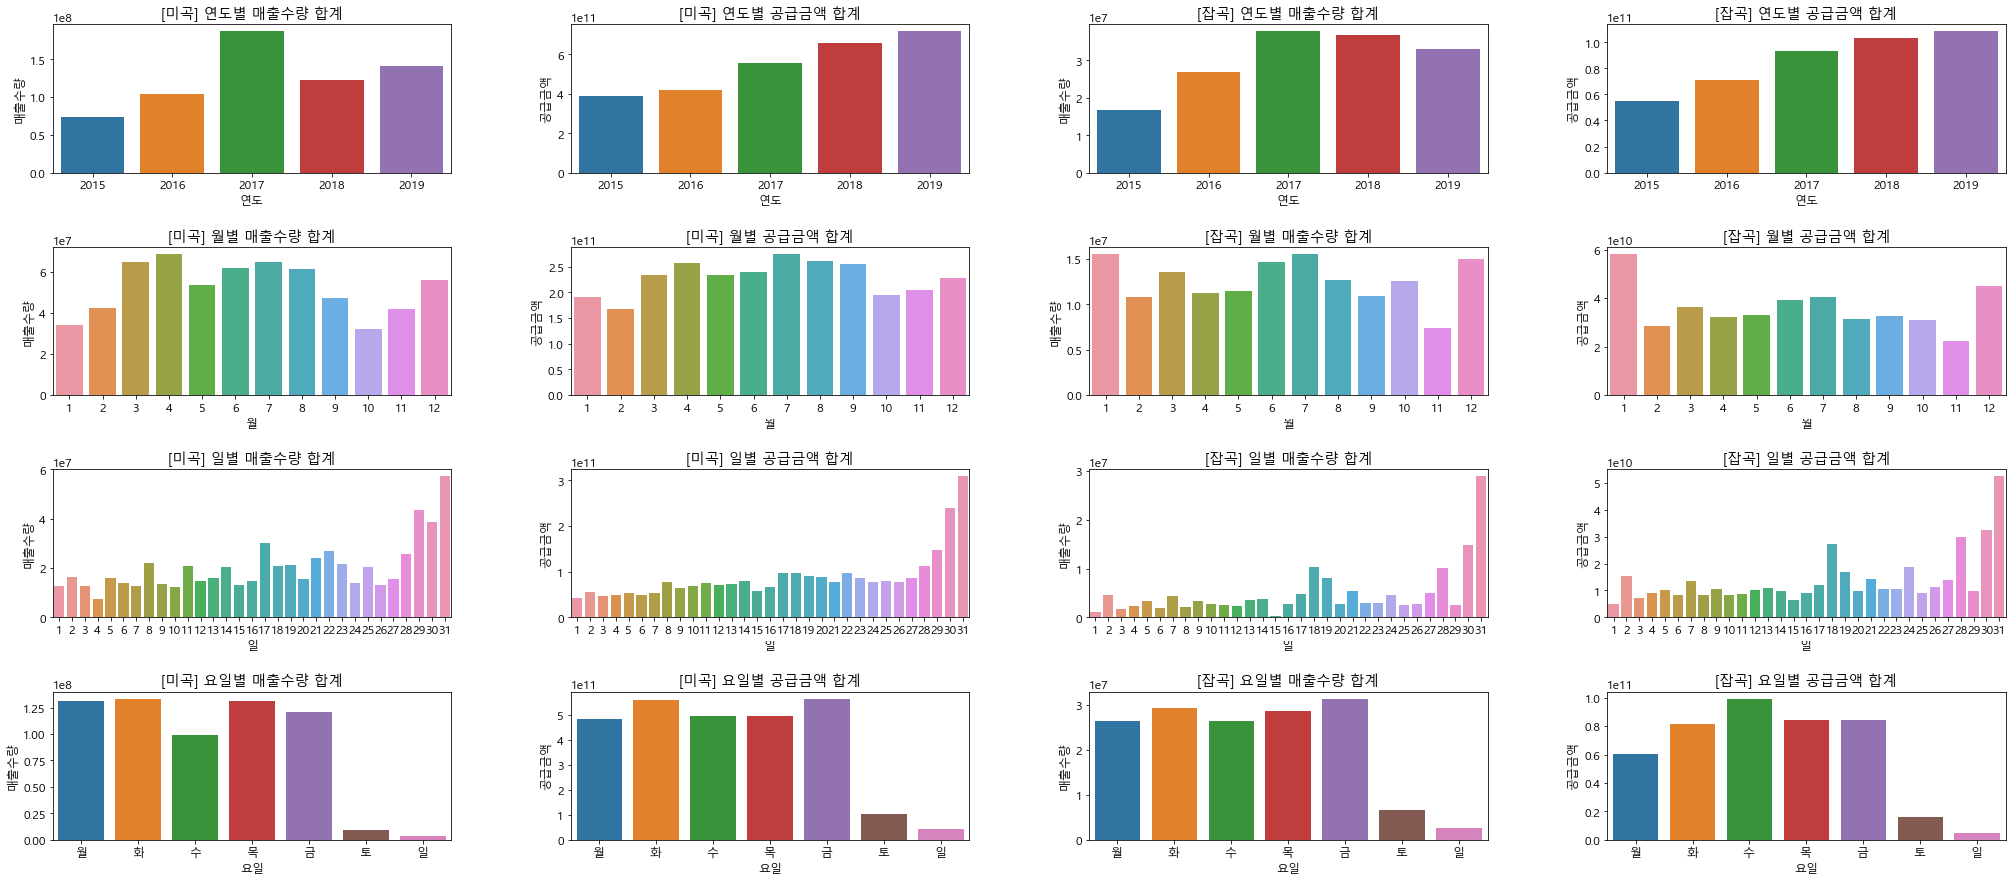

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=4)
fig.set_size_inches(35, 15)
fig.subplots_adjust(wspace=0.3, hspace=0.5)

# 연도별 매출수량/공급금액 합계
raw_summary = raw.groupby(['품종', '연도'], as_index=False).sum()

sns.barplot(data=raw_summary[raw_summary['품종']=='미곡'], x='연도', y='매출수량', ax=axes[0][0])
sns.barplot(data=raw_summary[raw_summary['품종']=='미곡'], x='연도', y='공급금액', ax=axes[0][1])
sns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='연도', y='매출수량', ax=axes[0][2])
sns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='연도', y='공급금액', ax=axes[0][3])

axes[0][0].set(title='[미곡] 연도별 매출수량 합계')
axes[0][1].set(title='[미곡] 연도별 공급금액 합계')
axes[0][2].set(title='[잡곡] 연도별 매출수량 합계')
axes[0][3].set(title='[잡곡] 연도별 공급금액 합계')

# 월별 매출수량/공급금액 평균
raw_summary = raw.groupby(['품종', '월'], as_index=False).sum()

sns.barplot(data=raw_summary[raw_summary['품종']=='미곡'], x='월', y='매출수량', ax=axes[1][0])
sns.barplot(data=raw_summary[raw_summary['품종']=='미곡'], x='월', y='공급금액', ax=axes[1][1])
sns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='월', y='매출수량', ax=axes[1][2])
sns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='월', y='공급금액', ax=axes[1][3])

axes[1][0].set(title='[미곡] 월별 매출수량 합계')
axes[1][1].set(title='[미곡] 월별 공급금액 합계')
axes[1][2].set(title='[잡곡] 월별 매출수량 합계')
axes[1][3].set(title='[잡곡] 월별 공급금액 합계')

# 일별 매출수량/공급금액 합계
raw_summary = raw.groupby(['품종', '일'], as_index=False).sum()

sns.barplot(data=raw_summary[raw_summary['품종']=='미곡'], x='일', y='매출수량', ax=axes[2][0])
sns.barplot(data=raw_summary[raw_summary['품종']=='미곡'], x='일', y='공급금액', ax=axes[2][1])
sns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='일', y='매출수량', ax=axes[2][2])
sns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='일', y='공급금액', ax=axes[2][3])

axes[2][0].set(title='[미곡] 일별 매출수량 합계')
axes[2][1].set(title='[미곡] 일별 공급금액 합계')
axes[2][2].set(title='[잡곡] 일별 매출수량 합계')
axes[2][3].set(title='[잡곡] 일별 공급금액 합계')

# 요일별 매출수량/공급금액 합계
raw_summary = raw.groupby(['품종', '요일'], as_index=False).sum()

sns.barplot(data=raw_summary[raw_summary['품종']=='미곡'], x='요일', y='매출수량', ax=axes[3][0], order=['월', '화', '수', '목', '금', '토', '일'])
sns.barplot(data=raw_summary[raw_summary['품종']=='미곡'], x='요일', y='공급금액', ax=axes[3][1], order=['월', '화', '수', '목', '금', '토', '일'])
sns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='요일', y='매출수량', ax=axes[3][2], order=['월', '화', '수', '목', '금', '토', '일'])
sns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='요일', y='공급금액', ax=axes[3][3], order=['월', '화', '수', '목', '금', '토', '일'])

axes[3][0].set(title='[미곡] 요일별 매출수량 합계')
axes[3][1].set(title='[미곡] 요일별 공급금액 합계')
axes[3][2].set(title='[잡곡] 요일별 매출수량 합계')
axes[3][3].set(title='[잡곡] 요일별 공급금액 합계')

plt.show()

In [7]:
'''
# ppt용 그래프 
    
fig.set_size_inches(35, 15)
# fig.subplots_adjust(wspace=0.3, hspace=0.5)

# 연도별 매출수량/공급금액 합
raw_summary = raw.groupby(['품종', '연도'], as_index=False).sum()

colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']

# sns.barplot(data=raw_summary[raw_summary['품종']=='미곡'], x='연도', y='공급금액', palette=colors).set(title='[미곡] 연도별 공급금액')
# sns.set_color_codes('pastel')
sns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='연도', y='공급금액', palette=colors).set(title='[잡곡] 연도별 공급금액', fontsize=20)
plt.show()
'''

"\n    ppt용 그래프 \n    \nfig.set_size_inches(35, 15)\n# fig.subplots_adjust(wspace=0.3, hspace=0.5)\n\n# 연도별 매출수량/공급금액 합\nraw_summary = raw.groupby(['품종', '연도']).sum().reset_index(['품종', '연도'])\n\ncolors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']\n\n# sns.barplot(data=raw_summary[raw_summary['품종']=='미곡'], x='연도', y='공급금액', palette=colors).set(title='[미곡] 연도별 공급금액')\n# sns.set_color_codes('pastel')\nsns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='연도', y='공급금액', palette=colors).set(title='[잡곡] 연도별 공급금액', fontsize=20)\nplt.show()\n"

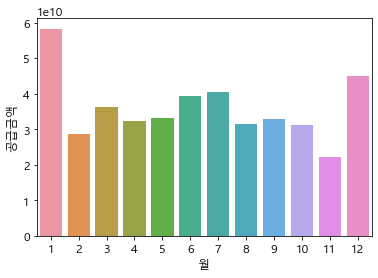

In [30]:
'''
# ppt용 그래프
    
# 월별 매출수량/공급금액 평균
raw_summary = raw.groupby(['품종', '월'], as_index=False).sum()

sns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='월', y='공급금액') # .set(title='[잡곡] 월별 공급금액 합계')
plt.show()
'''

### Analysis2 : 연도-월별 매출수량/공급금액 변화

In [8]:
'''
    연도와 월을 결합하여 새로운 열을 만드는 함수
'''

def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, format(datetime.month, '02'))

raw['연도_월'] = raw['매출일'].apply(concatenate_year_month)
raw[['매출일', '연도_월']].head()

,매출일,연도_월
0,2015-03-02,2015-03
1,2015-03-02,2015-03
2,2015-03-02,2015-03
3,2015-03-02,2015-03
4,2015-03-02,2015-03


In [9]:
raw_summary = raw.groupby(['품종', '연도_월'], as_index=False).sum()
raw_summary[raw_summary['품종']=='잡곡']

,품종,연도_월,매출번호,생산년도,매출수량,환산중량,매출단가,공급금액,연도,월,일
58,잡곡,2015-03,1682918,23596142,1956879.00,2.546217e+06,1.483980e+08,5857815731,23607740,35148,179871
59,잡곡,2015-04,2071301,26603053,1187280.00,1.911582e+06,1.587393e+08,5109139873,26616135,52836,213706
60,잡곡,2015-05,1763540,22867121,1929608.00,2.658703e+06,1.382110e+08,6056163162,22878310,56770,189905
61,잡곡,2015-06,2054901,26254724,1985629.00,2.741709e+06,1.498390e+08,6367890042,26267540,78216,202997
62,잡곡,2015-07,2454223,28591276,2107088.00,2.597694e+06,1.738494e+08,6096711114,28604940,99372,226278
63,잡곡,2015-08,1899610,22790939,1735969.00,3.613410e+06,1.327921e+08,4829308064,22801740,90528,189934
64,잡곡,2015-09,2535809,25590620,1607717.00,5.237036e+06,1.578897e+08,6393168504,25602590,114354,176234
65,잡곡,2015-10,2174088,25186956,976560.00,1.348795e+06,1.521386e+08,3713851394,25191530,125020,207313
66,잡곡,2015-11,1846715,23707422,2326982.00,2.687273e+06,2.361410e+08,5862847423,23710505,129437,175339
67,잡곡,2015-12,2227592,28972811,1050250.60,1.474550e+06,1.616692e+08,4392533598,28975700,172560,232899


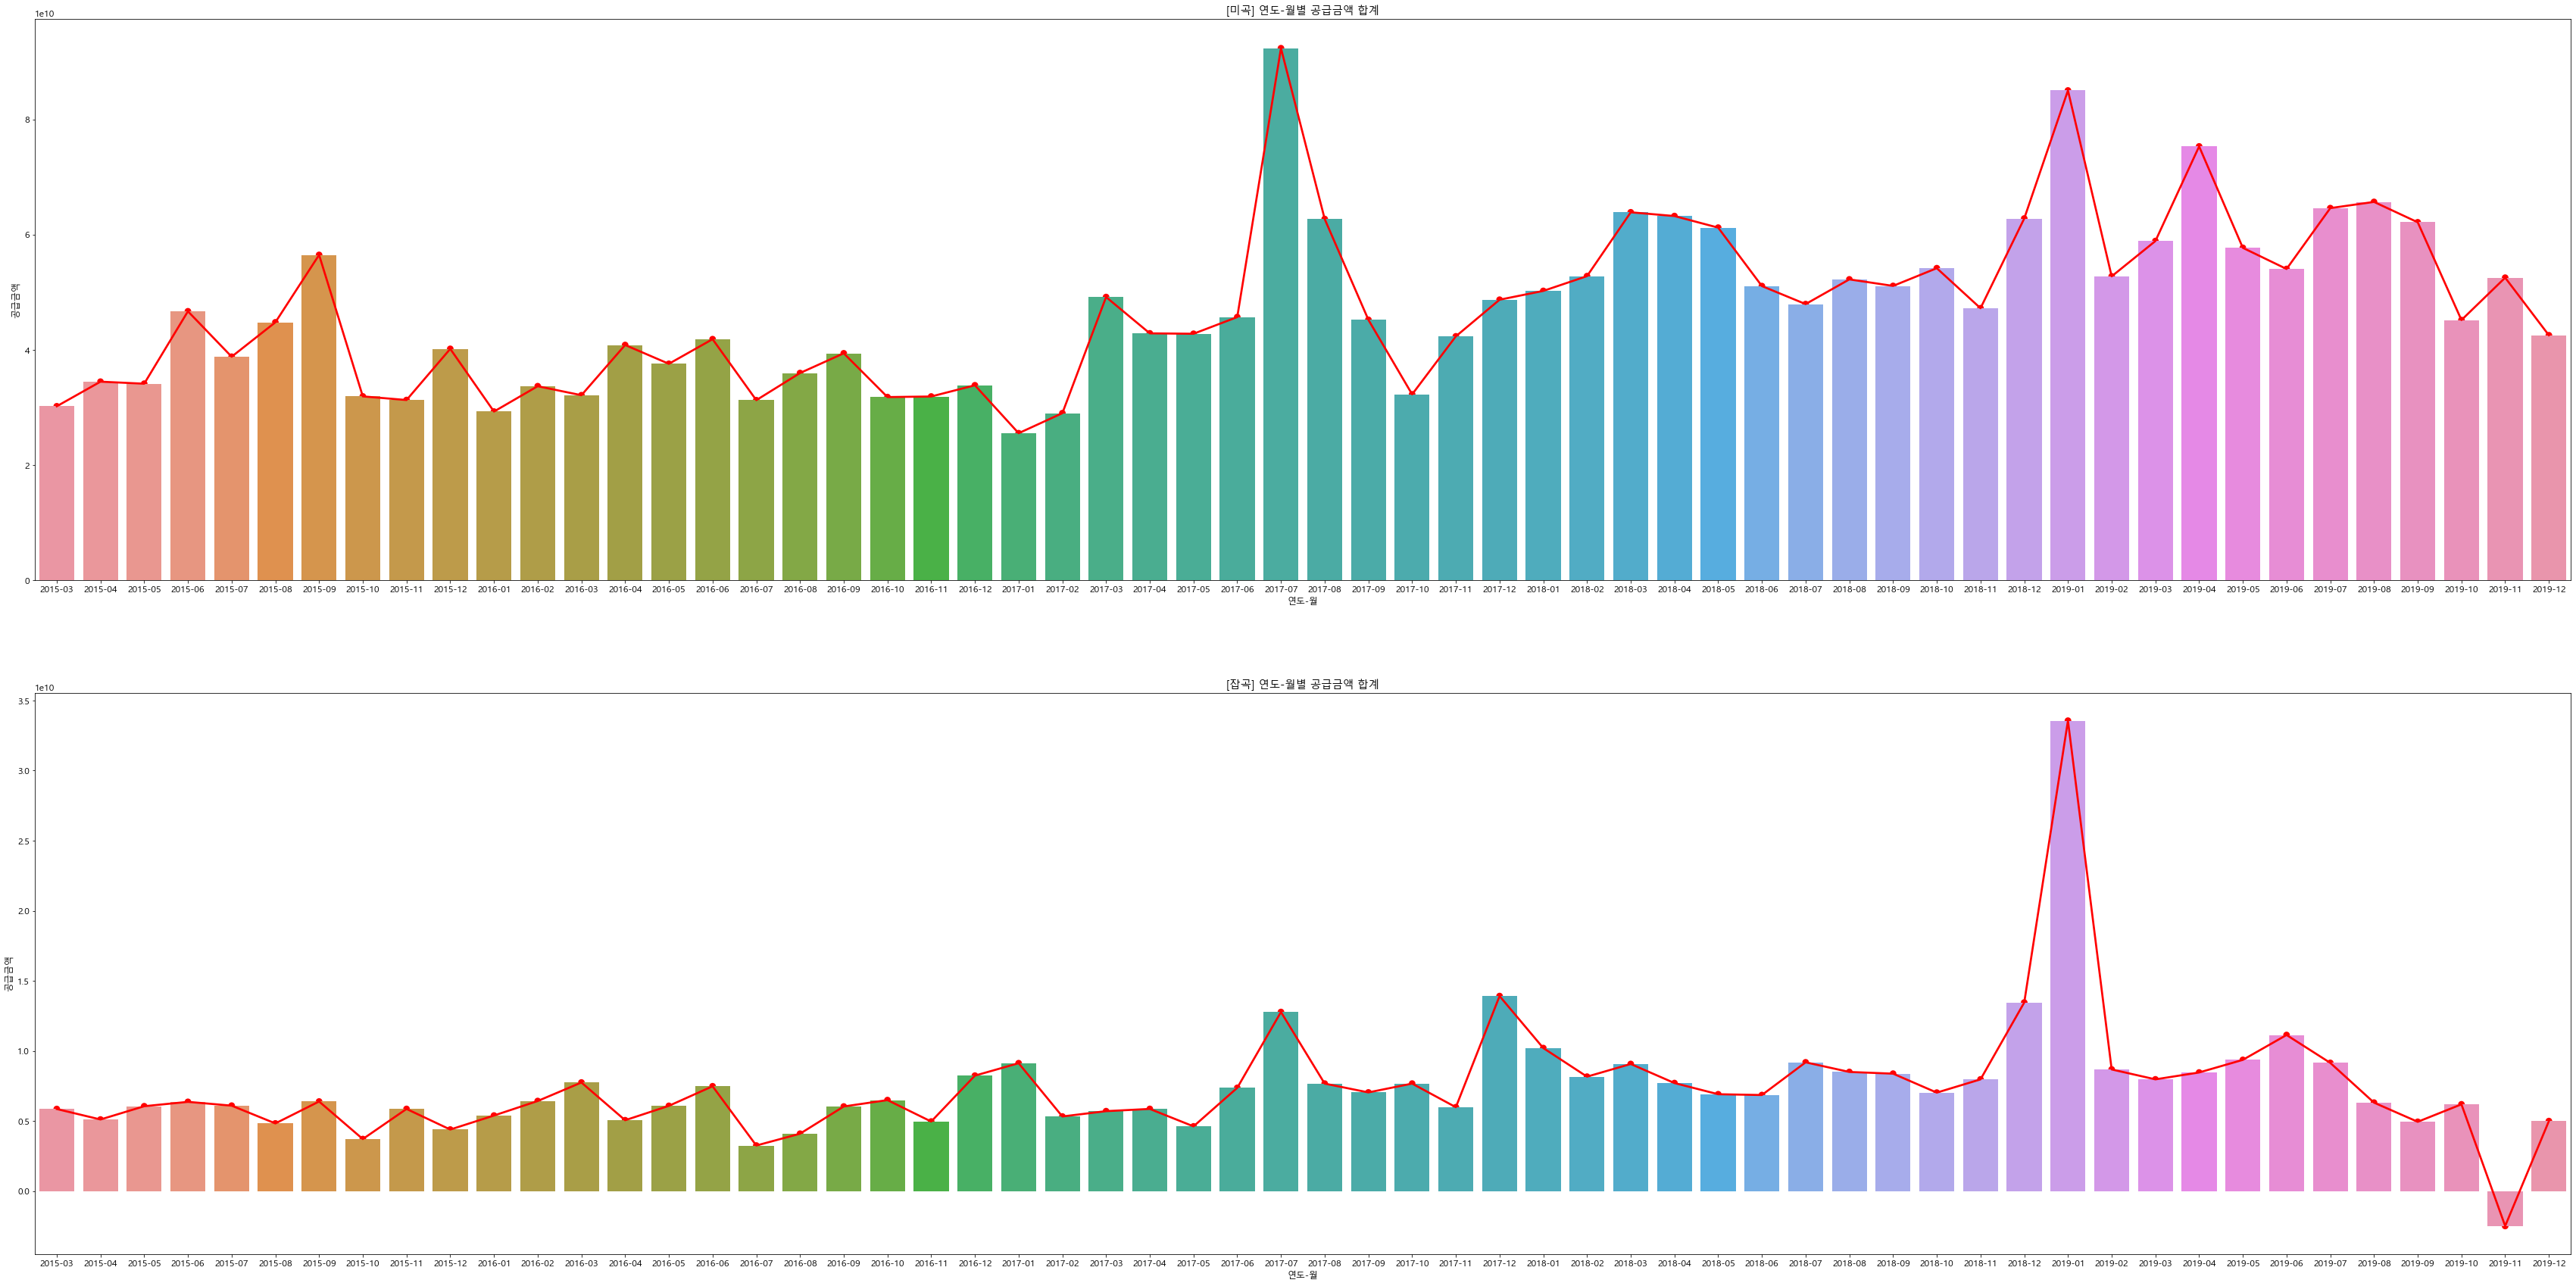

In [10]:
# 연도-월별 매출수량/공급금액 합계 변화

mpl.rcParams['font.size'] = 12

raw_summary = raw.groupby(['품종', '연도_월'], as_index=False).sum()

fig, (ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(60, 30)

sns.barplot(data=raw_summary[raw_summary['품종']=='미곡'], x='연도_월', y='공급금액', ax=ax1)
sns.pointplot(data=raw_summary[raw_summary['품종']=='미곡'], x='연도_월', y='공급금액', color='red', ax=ax1)
ax1.set(xlabel='연도-월', ylabel='공급금액', title='[미곡] 연도-월별 공급금액 합계')

sns.barplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='연도_월', y='공급금액', ax=ax2)
sns.pointplot(data=raw_summary[raw_summary['품종']=='잡곡'], x='연도_월', y='공급금액', color='red', ax=ax2)
ax2.set(xlabel='연도-월', ylabel='공급금액', title='[잡곡] 연도-월별 공급금액 합계')

plt.show()


### Analysis3 : 거래처유형별 공급금액 비율 변화

In [11]:
# 그룹별 누운막대 그래프를 그려주는 함수

def survey(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    
    category_colors = plt.get_cmap('rainbow')(np.linspace(0, 1., data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
        xcenters = starts + widths / 2
        text_color = 'black'
        
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c >= 0.1:
                ax.text(x, y, str(round(c, 1)) + '%', ha='center', va='center', color=text_color, 
                        fontsize=10, fontweight='bold')
                
                
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize=12)

    return fig, ax

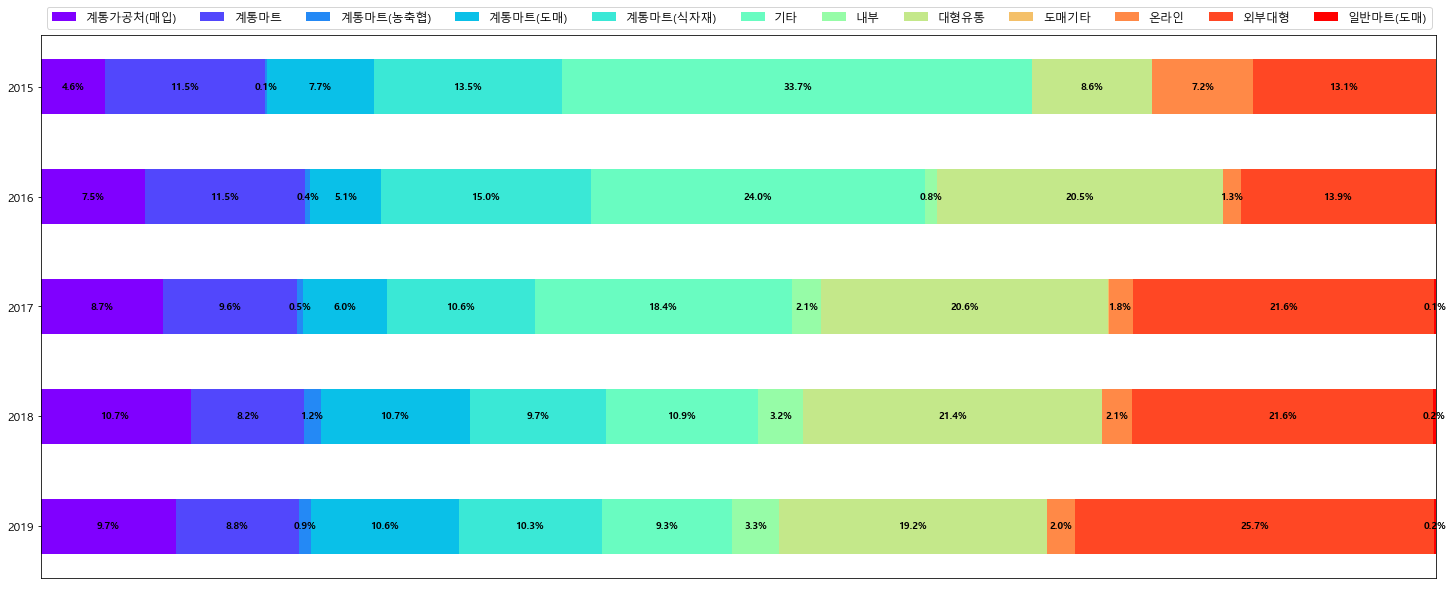

In [12]:
# 미곡 거래처유형별 공급금액 비율 추세
raw_summary = raw.groupby(['품종','연도'], as_index=False).sum()

# 매년 미곡 총 공급금액을 담을 리스트 생성
total_sales = []

for i in range(0, 5):
    total_sales.append(raw_summary[raw_summary['품종']=='미곡']['공급금액'][i])

# 거래처 유형별 그룹합
raw_summary = raw.groupby(['품종', '연도', '거래처유형'], as_index=False).sum()
rice_summary = raw_summary[raw_summary['품종']=='미곡']

var_list = ['품종', '연도', '거래처유형', '공급금액']
rice_summary = rice_summary[var_list].reset_index(drop=True)

# 2015년
rice_2015 = rice_summary[rice_summary['연도']==2015].copy()
rice_2015['매출비율'] = rice_2015['공급금액'] / total_sales[0] * 100

tmp_dic1 = {'품종':'미곡', '연도':2015, '거래처유형':'내부', '공급금액':0, '매출비율':0}
tmp_dic2 = {'품종':'미곡', '연도':2015, '거래처유형':'도매기타', '공급금액':0, '매출비율':0}
tmp_dic3 = {'품종':'미곡', '연도':2015, '거래처유형':'일반마트(도매)', '공급금액':0, '매출비율':0}
rice_2015 = rice_2015.append([tmp_dic1, tmp_dic2, tmp_dic3], ignore_index=True).sort_values(by='거래처유형')

# 2016년
rice_2016 = rice_summary[rice_summary['연도']==2016].copy()
rice_2016['매출비율'] = rice_2016['공급금액'] / total_sales[1] * 100

tmp_dic1 = {'품종':'미곡', '연도':2016, '거래처유형':'도매기타', '공급금액':0, '매출비율':0}
rice_2016 = rice_2016.append([tmp_dic1], ignore_index=True).sort_values(by='거래처유형')

# 2017년
rice_2017 = rice_summary[rice_summary['연도']==2017].copy()
rice_2017['매출비율'] = rice_2017['공급금액'] / total_sales[2] * 100
rice_2017.sort_values(by='거래처유형')

# 2018년
rice_2018 = rice_summary[rice_summary['연도']==2018].copy()
rice_2018['매출비율'] = rice_2018['공급금액'] / total_sales[3] * 100
rice_2018.sort_values(by='거래처유형')

# 2019년
rice_2019 = rice_summary[rice_summary['연도']==2019].copy()
rice_2019['매출비율'] = rice_2019['공급금액'] / total_sales[4] * 100

tmp_dic1 = {'품종':'미곡', '연도':2019, '거래처유형':'도매기타', '공급금액':0, '매출비율':0}
rice_2019 = rice_2019.append([tmp_dic1], ignore_index=True).sort_values(by='거래처유형')

rice_rate = pd.concat([rice_2015, rice_2016, rice_2017, rice_2018, rice_2019]).sort_values(by=['연도', '거래처유형'])

category_names = rice_2015['거래처유형'].tolist()

results = {
    '2015': rice_2015['매출비율'].tolist() ,
    '2016': rice_2016['매출비율'].tolist(),
    '2017': rice_2017['매출비율'].tolist(),
    '2018': rice_2018['매출비율'].tolist(),
    '2019': rice_2019['매출비율'].tolist(),
}

survey(results, category_names)
plt.show()

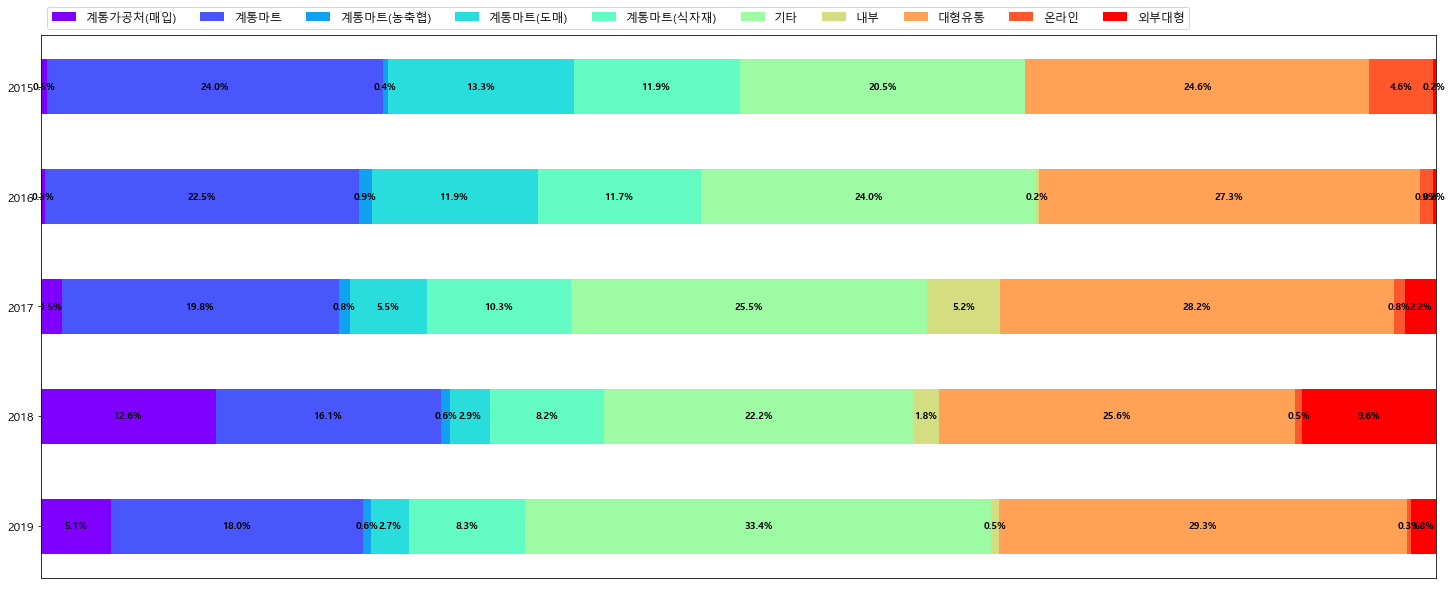

In [13]:
# 잡곡 거래처유형별 공급금액 비율 추세 
raw_summary = raw.groupby(['품종','연도'], as_index=False).sum()

# 매년 잡곡 총 공급금액을 담을 리스트 생성
total_sales = []

for i in range(5, 10):
    total_sales.append(raw_summary[raw_summary['품종']=='잡곡']['공급금액'][i])

# 거래처 유형별 그룹합
raw_summary = raw.groupby(['품종', '연도', '거래처유형'], as_index=False).sum()
grain_summary = raw_summary[raw_summary['품종']=='잡곡']

var_list = ['품종', '연도', '거래처유형', '공급금액']
grain_summary = grain_summary[var_list].reset_index(drop=True)

# 2015년
grain_2015 = grain_summary[grain_summary['연도']==2015].copy()
grain_2015['매출비율'] = grain_2015['공급금액'] / total_sales[0] * 100

tmp_dic = {'품종':'잡곡', '연도':2015, '거래처유형':'내부', '공급금액':0, '매출비율':0}
grain_2015 = grain_2015.append([tmp_dic], ignore_index=True).sort_values(by='거래처유형')

# 2016년
grain_2016 = grain_summary[grain_summary['연도']==2016].copy()
grain_2016['매출비율'] = grain_2016['공급금액'] / total_sales[1] * 100

# 2017년
grain_2017 = grain_summary[grain_summary['연도']==2017].copy()
grain_2017['매출비율'] = grain_2017['공급금액'] / total_sales[2] * 100
grain_2017.sort_values(by='거래처유형')

# 2018년
grain_2018 = grain_summary[grain_summary['연도']==2018].copy()
grain_2018['매출비율'] = grain_2018['공급금액'] / total_sales[3] * 100
grain_2018.sort_values(by='거래처유형')

# 2019년
grain_2019 = grain_summary[grain_summary['연도']==2019].copy()
grain_2019['매출비율'] = grain_2019['공급금액'] / total_sales[4] * 100

grain_rate = pd.concat([grain_2015, grain_2016, grain_2017, grain_2018, grain_2019]).sort_values(by=['연도', '거래처유형'])


category_names = grain_2015['거래처유형'].tolist()

results = {
    '2015': grain_2015['매출비율'].tolist() ,
    '2016': grain_2016['매출비율'].tolist(),
    '2017': grain_2017['매출비율'].tolist(),
    '2018': grain_2018['매출비율'].tolist(),
    '2019': grain_2019['매출비율'].tolist(),
}

survey(results, category_names)
plt.show()

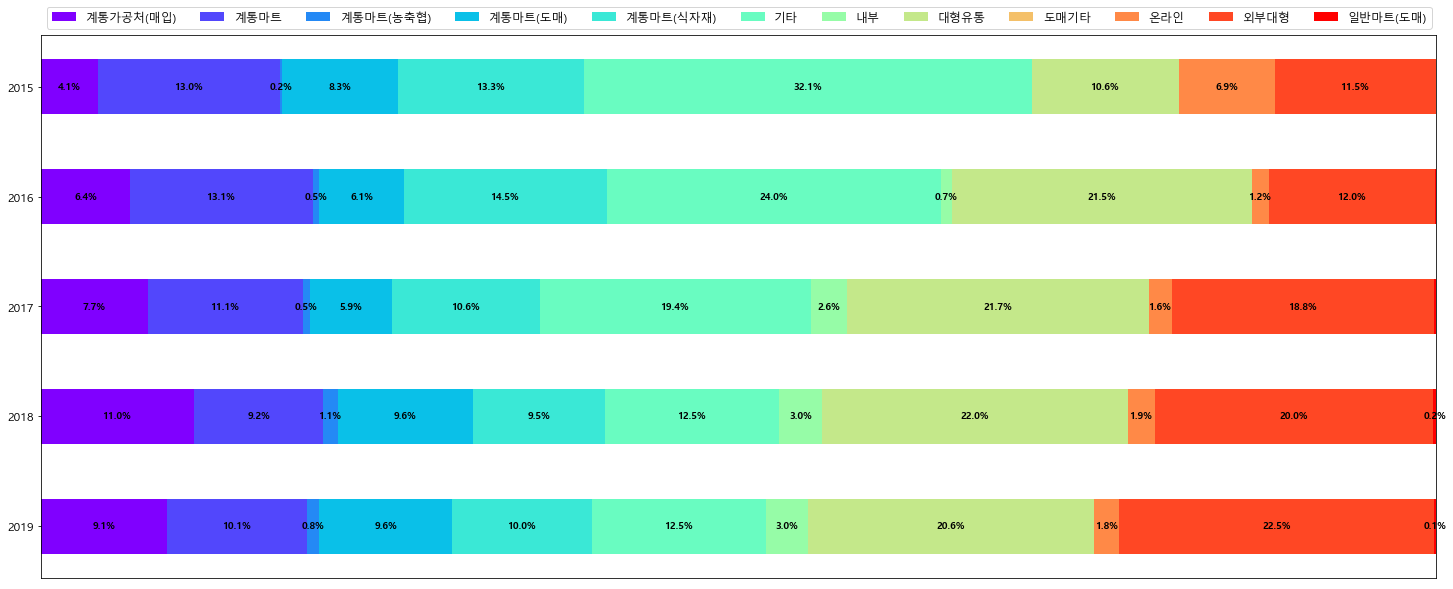

In [14]:
# 통합 거래처유형별 공급금액 비율 추세
raw_summary = raw.groupby(['연도'], as_index=False).sum()

# 매년 총 공급금액을 담을 리스트 생성
total_sales = []

for i in range(0, 5):
    total_sales.append(raw_summary['공급금액'][i])

# 거래처 유형별 그룹합
raw_summary = raw.groupby(['연도', '거래처유형'], as_index=False).sum()

var_list = ['연도', '거래처유형', '공급금액']
raw_summary = raw_summary[var_list].reset_index(drop=True)

# 2015년
raw_2015 = raw_summary[raw_summary['연도']==2015].copy()
raw_2015['매출비율'] = raw_2015['공급금액'] / total_sales[0] * 100
raw_2015.sort_values(by='거래처유형')

tmp_dic1 = {'연도':2015, '거래처유형':'내부', '공급금액':0, '매출비율':0}
tmp_dic2 = {'연도':2015, '거래처유형':'도매기타', '공급금액':0, '매출비율':0}
tmp_dic3 = {'연도':2015, '거래처유형':'일반마트(도매)', '공급금액':0, '매출비율':0}
raw_2015 = raw_2015.append([tmp_dic1, tmp_dic2, tmp_dic3], ignore_index=True).sort_values(by='거래처유형')

# 2016년
raw_2016 = raw_summary[raw_summary['연도']==2016].copy()
raw_2016['매출비율'] = raw_2016['공급금액'] / total_sales[1] * 100
raw_2016.sort_values(by='거래처유형')

tmp_dic1 = {'품종':'미곡', '연도':2016, '거래처유형':'도매기타', '공급금액':0, '매출비율':0}
raw_2016 = raw_2016.append([tmp_dic1], ignore_index=True).sort_values(by='거래처유형')

# 2017년
raw_2017 = raw_summary[raw_summary['연도']==2017].copy()
raw_2017['매출비율'] = raw_2017['공급금액'] / total_sales[2] * 100
raw_2017.sort_values(by='거래처유형')

# 2018년
raw_2018 = raw_summary[raw_summary['연도']==2018].copy()
raw_2018['매출비율'] = raw_2018['공급금액'] / total_sales[3] * 100
raw_2018.sort_values(by='거래처유형')

# 2019년
raw_2019 = raw_summary[raw_summary['연도']==2019].copy()
raw_2019['매출비율'] = raw_2019['공급금액'] / total_sales[4] * 100
raw_2019.sort_values(by='거래처유형')

tmp_dic1 = {'품종':'미곡', '연도':2019, '거래처유형':'도매기타', '공급금액':0, '매출비율':0}
raw_2019 = raw_2019.append([tmp_dic1], ignore_index=True).sort_values(by='거래처유형')

raw_rate = pd.concat([raw_2015, raw_2016, raw_2017, raw_2018, raw_2019]).sort_values(by=['연도', '거래처유형'])

category_names = raw_2015['거래처유형'].tolist()

results = {
    '2015': raw_2015['매출비율'].tolist() ,
    '2016': raw_2016['매출비율'].tolist(),
    '2017': raw_2017['매출비율'].tolist(),
    '2018': raw_2018['매출비율'].tolist(),
    '2019': raw_2019['매출비율'].tolist(),
}

survey(results, category_names)
plt.show()

### Analysis4 : 연도별 공급금액 상위 15곳 매출처명 

In [15]:
# 연도별 데이터프레임을 공급금액별로 정렬하고 합쳐 새로운 데이터프레임을 생성하는 함수

def concatenate_year_df(head_num,*DataFrame): # head_num : 연도별 가져올 매출처명 갯수, *DataFrame : 합칠 데이터프레임 
    
    tmp_df = pd.DataFrame()
    
    for df in DataFrame:
        tmp_df = tmp_df.append(df)
        
    tmp1 = tmp_df[tmp_df['연도']==2015].sort_values(by='공급금액', ascending=False).head(head_num)
    tmp2 = tmp_df[tmp_df['연도']==2016].sort_values(by='공급금액', ascending=False).head(head_num)
    tmp3 = tmp_df[tmp_df['연도']==2017].sort_values(by='공급금액', ascending=False).head(head_num)
    tmp4 = tmp_df[tmp_df['연도']==2018].sort_values(by='공급금액', ascending=False).head(head_num)
    tmp5 = tmp_df[tmp_df['연도']==2019].sort_values(by='공급금액', ascending=False).head(head_num)
    
    return pd.concat([tmp1, tmp2, tmp3, tmp4, tmp5]).reset_index(drop=True)

In [16]:
# 데이터프레임에서 보여줄 열 목록 리스트
columns = ['품종', '연도', '거래처유형', '매출처명', '공급금액']

In [17]:
# 미곡 연도별 상위 매출처명 15곳 공급금액
raw_summary = raw.groupby(['품종', '연도', '거래처유형', '매출처명'], as_index=False).sum()
rice_summary = raw_summary[raw_summary['품종']=='미곡']
rice_summary = concatenate_year_df(15, rice_summary)

# rice_summary[columns].head(45)
rice_summary[columns].tail(30)

,품종,연도,거래처유형,매출처명,공급금액
45,미곡,2018,외부대형,(주)오뚜기,53323800850
46,미곡,2018,계통마트(도매),(주)농협대전유통(도매),50517408376
47,미곡,2018,대형유통,롯데상사(주)마트,37535595057
48,미곡,2018,대형유통,농협경제지주 주식회사(대외마케팅),32579746466
49,미곡,2018,대형유통,롯데상사(주)안성공장,24523870379
50,미곡,2018,내부,농협양곡(주) 안성양곡유통센터(통합구매),17135930455
51,미곡,2018,외부대형,주식회사 여주농산,16411481700
52,미곡,2018,외부대형,농업회사법인(유)에브라임코리아,16285555825
53,미곡,2018,대형유통,홈플러스(주),15779848934
54,미곡,2018,계통마트(식자재),(주)농협하나로유통 성남점(식자재),15062837974


In [18]:
# 잡곡 상위 판매처 15곳 공급금액 합계
raw_summary = raw.groupby(['품종', '연도', '거래처유형', '매출처명'], as_index=False).sum()
grain_summary = raw_summary[raw_summary['품종']=='잡곡']
grain_summary = concatenate_year_df(15, grain_summary)

# grain_summary[columns].head(45)
grain_summary[columns].tail(30)

,품종,연도,거래처유형,매출처명,공급금액
45,잡곡,2018,대형유통,농협경제지주 주식회사(대외마케팅),25913353077
46,잡곡,2018,기타,씨제이프레시웨이주식회사,9701492120
47,잡곡,2018,기타,농업회사법인유한회사광복,7517694061
48,잡곡,2018,외부대형,주식회사 장원양곡,4404653730
49,잡곡,2018,외부대형,농업회사법인(유)에브라임코리아,4347434558
50,잡곡,2018,계통마트,(주)농협유통양재점,4006920713
51,잡곡,2018,계통마트,(주)농협유통창동유통센터(소매),3437959972
52,잡곡,2018,계통가공처(매입),북부농협 농산물 가공.유통센터(판매),3415493650
53,잡곡,2018,계통마트(식자재),(주)농협하나로유통 성남점(식자재),2770622989
54,잡곡,2018,계통가공처(매입),정남농협 잡곡유통사업단(판매),2545544910


### Analysis5 : 연도별 공급금액 품목상위 15개 품목명 

In [19]:
# 데이터프레임에서 보여줄 열 목록 리스트
columns = ['품종', '연도', '품목명', '공급금액']

In [20]:
# 미곡 연도별 상위 풍목명 15개 공급금액
raw_summary = raw.groupby(['품종', '연도', '품목명'], as_index=False).sum()
rice_summary = raw_summary[raw_summary['품종']=='미곡']

rice_summary = concatenate_year_df(15, rice_summary)

# rice_summary[columns].head(45)
rice_summary[columns].tail(30)

,품종,연도,품목명,공급금액
45,미곡,2018,벼(논벼)/1Kg,96053545055
46,미곡,2018,농협쌀한토래20kg,35312157525
47,미곡,2018,한토래청아미20kg,17033856450
48,미곡,2018,만세보령황진쌀/20kg,11129340463
49,미곡,2018,쌀(백미)/20Kg/포/익산시(황등면)/서동미,11127311707
50,미곡,2018,정다운쌀20kg,9026026188
51,미곡,2018,옥토진미 20kg,7289825921
52,미곡,2018,CJ_대표_양곡_KG,6784204234
53,미곡,2018,쌀(청결미)/20Kg/PP대/보령시(남포면)/푸른내음쌀,6501971186
54,미곡,2018,한토래벼익는마을(대상)20kg,6029021379


In [21]:
# 잡곡 연도별 상위 풍목명 15개 공급금액
raw_summary = raw.groupby(['품종', '연도', '품목명'], as_index=False).sum()
grain_summary = raw_summary[raw_summary['품종']=='잡곡']

grain_summary = concatenate_year_df(15, grain_summary)

grain_summary[columns].head(45)
# grain_summary[columns].tail(30)

,품종,연도,품목명,공급금액
0,잡곡,2015,현미(현미)/1Kg/의성군,9901122010
1,잡곡,2015,일반현미(1kg),5932288000
2,잡곡,2015,현미(현미)/20Kg/포/장평면,3701810000
3,잡곡,2015,현미(현미)/1Kg/진천군,3654975980
4,잡곡,2015,생거진천현미,922560000
5,잡곡,2015,보리쌀(찰보리쌀)/1Kg/국산,589929896
6,잡곡,2015,하나가득서리태4kg(4),453703590
7,잡곡,2015,하나가득현미4kg(5),453132030
8,잡곡,2015,콩(백태)/1Kg/PP대,399584250
9,잡곡,2015,콩(백태)/1Kg/PP대/국산,384697070


In [24]:
raw_summary = raw.groupby(['품종', '연도', '거래처유형', '품목명'], as_index=False).sum()
grain_summary = raw_summary[raw_summary['품종']=='잡곡']

# 웰빙혼합7곡500g(진공)
# grain_summary = grain_summary[grain_summary['매출처명'].isin(account_list)]
grain_summary = grain_summary[grain_summary['품목명'].isin(['웰빙혼합7곡500g(진공)'])]

grain_summary = concatenate_year_df(15, grain_summary)

grain_summary.head(50)

,품종,연도,거래처유형,품목명,매출번호,생산년도,매출수량,환산중량,매출단가,공급금액,월,일
0,잡곡,2015,계통마트,웰빙혼합7곡500g(진공),319,16112,29850.0,14925.0,20800.0,77900000,39,160
1,잡곡,2015,온라인,웰빙혼합7곡500g(진공),10034,149033,21447.0,10723.5,307700.0,56439750,389,1014
2,잡곡,2015,기타,웰빙혼합7곡500g(진공),5128,84584,18923.0,9461.5,111340.0,48248910,279,662
3,잡곡,2015,계통마트(식자재),웰빙혼합7곡500g(진공),593,8056,3625.0,1812.5,17500.0,8125000,15,39
4,잡곡,2015,계통마트(도매),웰빙혼합7곡500g(진공),26,2014,460.0,230.0,2750.0,1265000,5,12
5,잡곡,2015,계통가공처(매입),웰빙혼합7곡500g(진공),156,2014,400.0,200.0,2750.0,1100000,4,30
6,잡곡,2016,기타,웰빙혼합7곡500g(진공),2643,56420,12069.0,6034.5,80150.0,30367900,180,476
7,잡곡,2016,온라인,웰빙혼합7곡500g(진공),8173,139035,10571.0,5285.5,204840.0,28665250,533,1232
8,잡곡,2016,계통마트,웰빙혼합7곡500g(진공),87,14105,11240.0,5620.0,18050.0,27537500,35,106
9,잡곡,2016,계통마트(농축협),웰빙혼합7곡500g(진공),503,14105,2091.0,1045.5,20000.0,5840250,26,106


### 성장률

In [25]:
# 연도별 잡곡/미곡별 성장률 (2015 - 2019)
raw_summary = raw.groupby(['품종', '연도'], as_index=False).sum()
print((raw_summary[raw_summary['품종']=='미곡']['공급금액'][4] - raw_summary[raw_summary['품종']=='미곡']['공급금액'][0]) / raw_summary[raw_summary['품종']=='미곡']['공급금액'][0])
print((raw_summary[raw_summary['품종']=='잡곡']['공급금액'][9] - raw_summary[raw_summary['품종']=='잡곡']['공급금액'][5]) / raw_summary[raw_summary['품종']=='잡곡']['공급금액'][5])

0.8416621884558756
0.9803236614107793


In [26]:
# 연도별 잡곡/미곡별 공급금액 수치 (2015 - 2019)
print((raw_summary[raw_summary['품종']=='미곡']['공급금액'][4]))
print(raw_summary[raw_summary['품종']=='미곡']['공급금액'][0])

print(raw_summary[raw_summary['품종']=='잡곡']['공급금액'][5])
print(raw_summary[raw_summary['품종']=='잡곡']['공급금액'][9])

716256057774
388918262135
54679428905
108282966853
